# Import dependencies

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Create some random-ish scatter data

In [3]:
x = np.random.normal(scale=1.5, size=[20])
b = np.random.normal(scale=2, size=[20])
y = (3 * x) + (2 * b)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


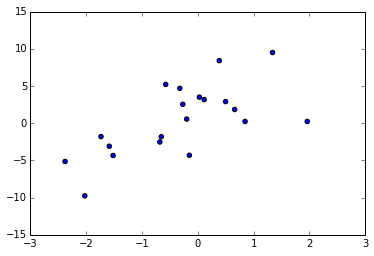

In [4]:
plt.scatter(x, y)
plt.show()

# Create our linear model graph

* `x_placeholder` and `y_placeholder` are our placeholder operations, which hold the input and correct output, respectively
* Our `m` and `b` units are `tf.Variable` nodes. These are what will be trained by our optimizer object. We instantiate `m` to have a normal distribution (with values +/- 2 standard deviations resampled), while `b` starts off as a vector of zeros
* We get our estimated value, `y_hat` by multiplying `m` and `x`, then adding b.
* We're using mean squared error as our target function
* `GradientDescentOptimizer` is one of several `tf.Optimizer` classes, this one performs standard gradient descent. We set our learning rate to 0.05, and our goal is to minimize `error`

In [5]:
x_placeholder = tf.placeholder(tf.float32, [None], name='x')
y_placeholder = tf.placeholder(tf.float32, [None], name='y')
m = tf.Variable(tf.truncated_normal([]), name='m')
b = tf.Variable(tf.constant(0, dtype=tf.float32), name='b')
y_hat = tf.mul(m, x_placeholder) + b

error = tf.reduce_mean(tf.square(y_hat - y_placeholder), name='MSE')

train = tf.train.GradientDescentOptimizer(0.05).minimize(error)

init = tf.initialize_all_variables()

# Now run the graph

In [6]:
sess = tf.Session()
sess.run(init)

x_test = np.array([-5.0, 0.0, 5.0])
test_dict = {x_placeholder: x_test}
snapshots = []

for i in range(50):
    feed_dict = {
        x_placeholder: x,
        y_placeholder: y
    }
    err, _ = sess.run([error, train], feed_dict=feed_dict)
    print(str(i) + ":\tMSE: %.3f" % err)
    
    if i in [0, 1, 4, 10, 49]:
        y_test = sess.run(y_hat, feed_dict=test_dict)
        snapshots.append((i, y_test))
    

0:	MSE: 20.887
1:	MSE: 19.056
2:	MSE: 17.632
3:	MSE: 16.519
4:	MSE: 15.643
5:	MSE: 14.949
6:	MSE: 14.396
7:	MSE: 13.953
8:	MSE: 13.596
9:	MSE: 13.307
10:	MSE: 13.072
11:	MSE: 12.880
12:	MSE: 12.722
13:	MSE: 12.592
14:	MSE: 12.485
15:	MSE: 12.396
16:	MSE: 12.322
17:	MSE: 12.260
18:	MSE: 12.209
19:	MSE: 12.166
20:	MSE: 12.130
21:	MSE: 12.100
22:	MSE: 12.074
23:	MSE: 12.053
24:	MSE: 12.035
25:	MSE: 12.020
26:	MSE: 12.008
27:	MSE: 11.997
28:	MSE: 11.988
29:	MSE: 11.980
30:	MSE: 11.974
31:	MSE: 11.968
32:	MSE: 11.964
33:	MSE: 11.960
34:	MSE: 11.957
35:	MSE: 11.954
36:	MSE: 11.952
37:	MSE: 11.950
38:	MSE: 11.948
39:	MSE: 11.947
40:	MSE: 11.946
41:	MSE: 11.945
42:	MSE: 11.944
43:	MSE: 11.943
44:	MSE: 11.942
45:	MSE: 11.942
46:	MSE: 11.941
47:	MSE: 11.941
48:	MSE: 11.941
49:	MSE: 11.940


# Graph what the model looks like as it learns

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


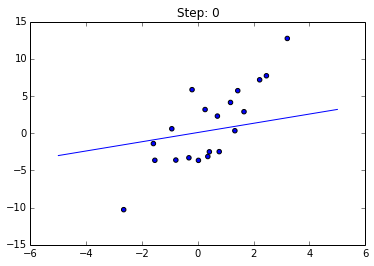

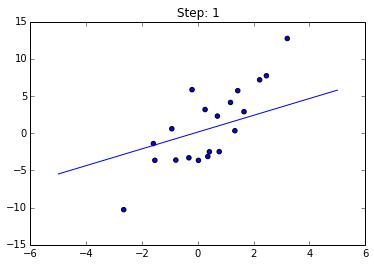

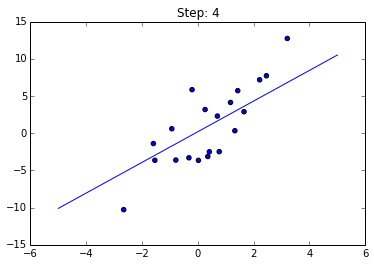

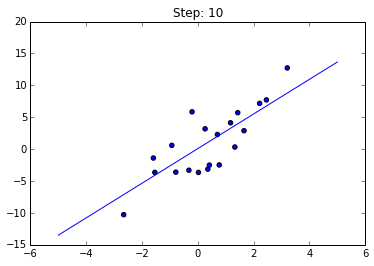

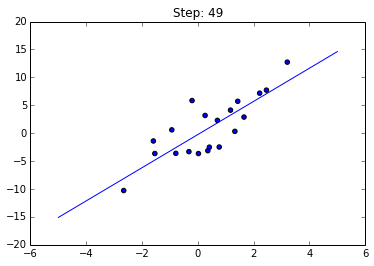

In [21]:
for i, pair in enumerate(snapshots):
    step, y_test = pair
    plt.figure(i)
    plt.title('Step: ' + str(step))
    plt.scatter(x, y)
    plt.plot(x_test, y_test)
plt.show()